In [ ]:
!pip install dimod
!pip install 'qiskit[all]'
!pip install dwave-neal

  Using cached matplotlib-3.4.3-cp37-cp37m-manylinux1_x86_64.whl (10.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install 'qiskit-optimization[cplex]'

In [ ]:
!pip install matplotlib==3.1.3

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-experiments 0.1.0 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install plotly

In [ ]:
!pip install gsgmorph

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from time import time
from pprint import pprint
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import clear_output

In [ ]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from dimod import BinaryQuadraticModel, AdjVectorBQM
from qiskit.optimization import QuadraticProgram
from qiskit.optimization.converters import LinearEqualityToPenalty, InequalityToEquality, IntegerToBinary
import neal

/usr/local/lib/python3.7/dist-packages/qiskit/aqua/__init__.py:86: DeprecationWarning:

The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>

/usr/local/lib/python3.7/dist-packages/qiskit/optimization/__init__.py:92: DeprecationWarning:

The package qiskit.optimization is deprecated. It was moved/refactored to qiskit_optimization (pip install qiskit-optimization). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>



In [ ]:
from qiskit.aqua.algorithms import QAOA
from qiskit.optimization.algorithms import MinimumEigenOptimizer
from qiskit import Aer
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_city
from qiskit.aqua.components.optimizers import COBYLA, SLSQP, ADAM, L_BFGS_B
from qiskit.optimization import QuadraticProgram
from docplex.mp.model import Model

from qiskit.optimization.applications.ising import stable_set
from qiskit import Aer
from qiskit.optimization.applications.ising import stable_set
from qiskit.aqua.algorithms import VQE, NumPyMinimumEigensolver, QAOA, NumPyEigensolver
from qiskit.aqua import aqua_globals
from qiskit.aqua import QuantumInstance
from qiskit.optimization.applications.ising.common import sample_most_likely
from qiskit.optimization.algorithms import MinimumEigenOptimizer
from qiskit.optimization.problems import QuadraticProgram

In [ ]:
import gsgmorph.matrix_form as gsgm_mf
import networkx as nx

graph_to_embed = nx.Graph([(0,1),(1,2),(2,3),(3,4),(4,0)])
target_graph = nx.Graph([('a','b'),('b','c'),('c', 'd'), ('d', 'e'),('e', 'a')])

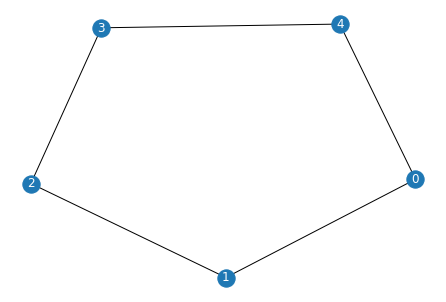

In [ ]:
# Get fixed position
pos = nx.spring_layout(graph_to_embed, seed=9999)

# Graph to be embedded onto a target graph
nx.draw(graph_to_embed, pos, with_labels=True, font_color='w')

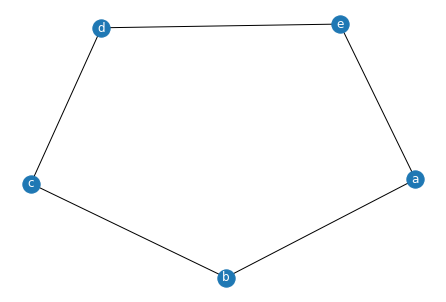

In [ ]:

# Get fixed position
pos = nx.spring_layout(target_graph, seed=9999)

# Target graph, the above graph will be mapped to this one
nx.draw(target_graph, pos, with_labels=True, font_color='w')

In [ ]:

# Obtain the QUBO and the sample translation dictionary
Q, sample_translation_dict = gsgm_mf.graph_isomorphism(graph_to_embed, target_graph)

In [ ]:
Q

defaultdict(int,
            {(0, 0): -2,
             (0, 1): 2,
             (0, 2): 2,
             (0, 3): 2,
             (0, 4): 2,
             (0, 5): 3,
             (0, 7): 1,
             (0, 8): 1,
             (0, 10): 2,
             (0, 15): 2,
             (0, 20): 3,
             (0, 22): 1,
             (0, 23): 1,
             (1, 1): -2,
             (1, 2): 2,
             (1, 3): 2,
             (1, 4): 2,
             (1, 6): 3,
             (1, 8): 1,
             (1, 9): 1,
             (1, 11): 2,
             (1, 16): 2,
             (1, 21): 3,
             (1, 23): 1,
             (1, 24): 1,
             (2, 2): -2,
             (2, 3): 2,
             (2, 4): 2,
             (2, 5): 1,
             (2, 7): 3,
             (2, 9): 1,
             (2, 12): 2,
             (2, 17): 2,
             (2, 20): 1,
             (2, 22): 3,
             (2, 24): 1,
             (3, 3): -2,
             (3, 4): 2,
             (3, 5): 1,
             (3, 6): 1,
    

In [ ]:
def qubo_matrix_to_docplex(Q): 

  def build_matrix(data):
    data = dict(data)
    maxX = max([x for (x, y) in list(data.keys())])
    maxY = max([y for (x, y) in list(data.keys())])
    maxX = max([maxX, maxY])
    maxY = max([maxX, maxY])
    mat = np.zeros(shape=(maxX+1, maxY+1))
    for key, value in data.items():
        x, y = key
        mat[x][y] = value
    return mat

  # Print out the Qubo Matrix
  Q_matrix = build_matrix(Q)
  print(Q_matrix)
  print("Size of QUBO Matrix is: ", len(Q_matrix))

  def build_linear(Q, Q_matrix): 
    linear_dict = {}
    for idx in range(len(Q_matrix)): 
      linear_dict['x_{0}'.format(idx)] = Q[(idx,idx)]
    print('Linear part: ', linear_dict)
    return linear_dict

  def build_quadratic(Q, Q_matrix): 
    quadratic_dict = {}
    for node_pair in Q: 
      x,y = node_pair
      if x != y: 
        quadratic_dict[(f'x_{x}', f'x_{y}')] = Q[(x,y)]
    print('Quadratic Part: ', quadratic_dict)
    return quadratic_dict

  def build_constant(Q_matrix): 
    #Empirically decided!
    import math 
    number_of_nodes= math.sqrt(len(Q_matrix))
    constant = number_of_nodes * 2
    print(constant)
    return constant


  linear = build_linear(Q, Q_matrix)
  quadratic = build_quadratic(Q, Q_matrix)
  constant = build_constant(Q_matrix)

  mdl = QuadraticProgram('Graph Isomorphism')
  for node_pair in Q: 
    x,y = node_pair
    if x == y: 
      mdl.binary_var(name='x_{0}'.format(x))
  
  mdl.minimize(constant=constant, linear=linear, quadratic=quadratic)
  print(mdl.export_as_lp_string())

  return mdl

In [ ]:
import math 

def build_matrix(data):
    data = dict(data)
    maxX = max([x for (x, y) in list(data.keys())])
    maxY = max([y for (x, y) in list(data.keys())])
    maxX = max([maxX, maxY])
    maxY = max([maxX, maxY])
    mat = np.zeros(shape=(maxX+1, maxY+1))
    for key, value in data.items():
        x, y = key
        mat[x][y] = value
    return mat

# Print out the Qubo Matrix
Q_matrix = build_matrix(Q)
math.sqrt(len(Q_matrix))

5.0

In [ ]:
mdl = qubo_matrix_to_docplex(Q)

[[-2.  2.  2.  2.  2.  3.  0.  1.  1.  0.  2.  0.  0.  0.  0.  2.  0.  0.
   0.  0.  3.  0.  1.  1.  0.]
 [ 0. -2.  2.  2.  2.  0.  3.  0.  1.  1.  0.  2.  0.  0.  0.  0.  2.  0.
   0.  0.  0.  3.  0.  1.  1.]
 [ 0.  0. -2.  2.  2.  1.  0.  3.  0.  1.  0.  0.  2.  0.  0.  0.  0.  2.
   0.  0.  1.  0.  3.  0.  1.]
 [ 0.  0.  0. -2.  2.  1.  1.  0.  3.  0.  0.  0.  0.  2.  0.  0.  0.  0.
   2.  0.  1.  1.  0.  3.  0.]
 [ 0.  0.  0.  0. -2.  0.  1.  1.  0.  3.  0.  0.  0.  0.  2.  0.  0.  0.
   0.  2.  0.  1.  1.  0.  3.]
 [ 0.  0.  0.  0.  0. -2.  2.  2.  2.  2.  3.  0.  1.  1.  0.  2.  0.  0.
   0.  0.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -2.  2.  2.  2.  0.  3.  0.  1.  1.  0.  2.  0.
   0.  0.  0.  2.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -2.  2.  2.  1.  0.  3.  0.  1.  0.  0.  2.
   0.  0.  0.  0.  2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -2.  2.  1.  1.  0.  3.  0.  0.  0.  0.
   2.  0.  0.  0.  0.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -2.  0.  1.  1.  

In [ ]:
# Put the QUBO on the annealer and obtain the lowest energy solution.
# NOTE: It is possible to have multiple acceptable solutions!
import neal
sampler = neal.SimulatedAnnealingSampler()
sampleset = sampler.sample_qubo(Q, num_reads=100)
sampleset = sampleset.aggregate()
best_sample = sampleset.first

In [ ]:
sampleset

SampleSet(rec.array([([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], -10., 10),
           ([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], -10., 12),
           ([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], -10., 13),
           ([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], -10., 13),
           ([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], -10.,  9),
           ([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], -10., 15),
           ([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], -10.,  4),
           ([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], -10., 11),
           ([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], -10.,  7),
           ([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], -

In [ ]:
# We can use an annealing sample and the sample translation dictionary from before to
# generate a dictionary that maps nodes from the graph to be embedded to the target graph
mapping = gsgm_mf.translate_sample(best_sample, sample_translation_dict)

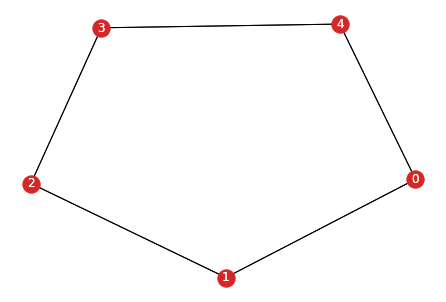

In [ ]:
# We can use NetworkX to help us visualize the subgraph and how it maps to the target graph

# Invert the mapping so it is from the target graph TO the graph to embed nodes
# Snippet taken from: 
# https://stackoverflow.com/a/483833
inv_mapping = {v: k for k, v in mapping.items()}

# relabel the nodes in the target graph with the node labels from the graph to embed
updated_nodes = nx.relabel_nodes(target_graph, inv_mapping, copy=True)
# Get the same fixed position used before
pos = nx.spring_layout(updated_nodes, seed=9999)

# Highlight the nodes that have been relabeled
nx.draw(updated_nodes, pos, with_labels=True, 
        font_color='w', 
        nodelist=[key for key in mapping.keys()], 
        node_color="tab:red")

# Difference between two lists:
# https://stackoverflow.com/a/3462160
nx.draw(updated_nodes, 
        pos, 
        with_labels=True, 
        font_color='w', 
        nodelist=list(set(updated_nodes.nodes()) - set(mapping.keys())), 
        node_color="tab:blue")

In [ ]:
import numpy as np

def build_matrix(data):
    data = dict(data)

    maxX = max([x for (x, y) in list(data.keys())])
    maxY = max([y for (x, y) in list(data.keys())])

    maxX = max([maxX, maxY])
    maxY = max([maxX, maxY])

    mat = np.zeros(shape=(maxX+1, maxY+1))

    for key, value in data.items():
        x, y = key
        mat[x][y] = value

    return mat

Q_mat = build_matrix(Q)

In [ ]:
s = neal.SimulatedAnnealingSampler()
sampleset = s.sample_qubo(Q, beta_range=(5, 100), num_sweeps=20000, num_reads=100,
                        beta_schedule_type='geometric')

In [ ]:
# Post processing

# Offset is empirically calculated as of now. 
# From preliminary experiments, the offset is 
# calculated to be 2 * number of nodes of the 
# graph

offset = 2.0 * len(graph_to_embed.nodes)

energies = []
final_energies = []
for datum in sampleset.data(fields=["sample", "energy"]):
    energies.append(datum.energy)

print(offset)
for energy in energies: 
  final_energy = float(energy) + float(offset)
  final_energies.append(final_energy)

10.0


In [ ]:
len(graph_to_embed.nodes)

5

In [ ]:
final_energies

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
aqua_globals.random_seed = np.random.default_rng(123)
seed = 10598
backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, seed_simulator=seed, seed_transpiler=seed)

qaoa = QAOA(quantum_instance=quantum_instance, p = 1)

# create minimum eigen optimizer based on qaoa
qaoa_optimizer = MinimumEigenOptimizer(qaoa)

# solve quadratic program
result = qaoa_optimizer.solve(mdl)

/usr/local/lib/python3.7/dist-packages/qiskit/utils/deprecation.py:62: DeprecationWarning:

Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).



In [ ]:
print(result)

optimal function value: 5.0
optimal value: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0.]
status: SUCCESS


In [ ]:
offset

8.0

In [ ]:
# 3 nodes , offset = 2 * num_nodes
# 4 nodes , offset = 2.5 * num_nodes
# 5 nodes , offset = 3 * num_nodes